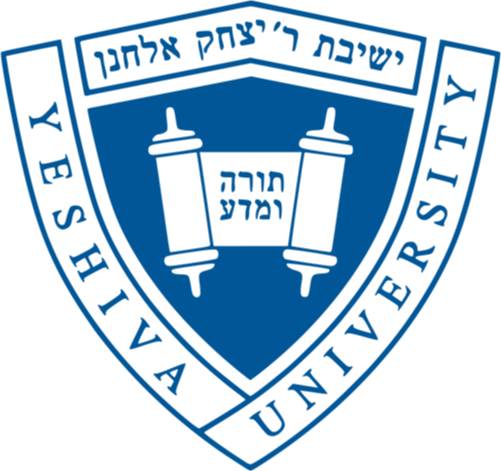

# <center>Katz School of Science and Health<br>AIM 5001 Data Acquisition & Management<br><br>M7 Project 2: Using PostgreSQL + Pandas for Data Management & Analysis</center>
<br><br>

### <center>Radek Jan Holik</center>
### <center>Jatin Kayasth</center>

## Part 1: 
Introduction (10 Points)
A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.

For our project, we have chosen the data set of the world population, respectively the population of individual countries. This data set records the population of each country since 1960 until 2021. Furthermore, every record contains the following items: country name, country code, capital, continent and area.
<p>
In our project, we will answer the following research questions:

- Which twenty countries are most populous in the world?
- What is the population growth or decline of the 20 most populous countries?
- Which twenty countries have the highest population growth?
- Is it possible to assume that any country will have double its population in 2050 compared to 2020? If so, which country?
- Which twenty countries have the highest population density?
- Which country belongs to both lists of the twenty countries with the highest population growth and the highest population density?
- What was the world's population growth rate in % every year since 1960?
- Is this world's population growth increasing or decreasing over the years?
- What world's population can be expected in 2050?

## Part 2: 
Data Summary (10 Points)
Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. Be sure include any Python code used as part of your Data Summary work.

#### Our dataset was obtained from https://data.worldbank.org/

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

pd.set_option('max_columns', 200)
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm

#### Imports and Reading Data

In [3]:
# The file path to my online AIM 5001 Github Repository with the "World-population-by-countries-dataset.csv" file
filePath = r'https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module%2007/World-population-by-countries-dataset.csv'
df = pd.read_csv(filePath)

### Data Understanding

In [3]:
# Dataframe shape
df.shape

(213, 67)

#### Our data includes 213 use cases / records.
#### Each recod contains 67 attributes.

In [93]:
# Column names
df.columns

Index(['Country_Name', 'Country_Code', 'Capital', 'Continent', 'Area_(km²)',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

#### Dataset Glossary (Column-Wise):
- Country_Name: Name of the Country/Territories.
- Country_Code: 3 Digit Country/Territories Code.
- Capital: Name of the Capital.
- Continent: Name of the Continent.
- Area (km²): Area size of the Country/Territories in square kilometer.
- 1960: Population of the Country/Territories in the year 1960.<p>
$\vdots$<br>
- 2021: Population of the Country/Territories in the year 2021.

#### Data types

In [94]:
# Data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 67 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country_Name  213 non-null    object 
 1   Country_Code  213 non-null    object 
 2   Capital       213 non-null    object 
 3   Continent     213 non-null    object 
 4   Area_(km²)    213 non-null    int64  
 5   1960          213 non-null    int64  
 6   1961          213 non-null    int64  
 7   1962          213 non-null    int64  
 8   1963          213 non-null    int64  
 9   1964          213 non-null    int64  
 10  1965          213 non-null    int64  
 11  1966          213 non-null    int64  
 12  1967          213 non-null    int64  
 13  1968          213 non-null    int64  
 14  1969          213 non-null    int64  
 15  1970          213 non-null    int64  
 16  1971          213 non-null    int64  
 17  1972          213 non-null    int64  
 18  1973          213 non-null    

**The Dtype column in the above shows the data type for each of the column. "Object " Dtype is Categorical , "int64" and "float64" are numeric.**

In [95]:
# Basic statistics
df.describe()

,Area_(km²),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02
mean,6.311113e+05,1.409999e+07,1.428133e+07,1.452600e+07,1.482749e+07,1.513072e+07,1.544047e+07,1.576488e+07,1.608803e+07,1.641790e+07,1.675912e+07,1.710796e+07,1.747216e+07,1.782628e+07,1.817903e+07,1.852904e+07,1.887203e+07,1.920971e+07,1.954469e+07,1.988531e+07,2.023456e+07,2.058711e+07,2.094892e+07,2.132474e+07,2.170394e+07,2.208191e+07,2.246709e+07,2.286380e+07,2.327114e+07,2.368271e+07,2.409401e+07,2.450236e+07,2.490990e+07,2.541972e+07,2.581607e+07,2.620725e+07,2.647612e+07,2.686009e+07,2.724300e+07,2.762253e+07,2.799709e+07,2.836814e+07,2.873664e+07,2.910417e+07,2.947218e+07,2.984274e+07,3.021570e+07,3.059215e+07,3.097079e+07,3.135554e+07,3.173896e+07,3.212102e+07,3.250113e+07,3.289772e+07,3.329778e+07,3.369846e+07,3.409674e+07,3.449583e+07,3.489380e+07,3.528078e+07,3.565734e+07,3.602949e+07,3.636721e+07
std,1.837701e+06,5.784412e+07,5.791724e+07,5.865092e+07,5.998061e+07,6.129298e+07,6.265650e+07,6.420046e+07,6.569865e+07,6.725319e+07,6.891022e+07,7.063336e+07,7.241448e+07,7.410821e+07,7.576271e+07,7.734924e+07,7.882174e+07,8.021071e+07,8.153263e+07,8.286835e+07,8.423114e+07,8.557955e+07,8.697198e+07,8.849299e+07,9.002544e+07,9.150815e+07,9.303601e+07,9.465028e+07,9.634675e+07,9.806622e+07,9.976164e+07,1.014372e+08,1.030739e+08,1.048769e+08,1.064119e+08,1.079465e+08,1.092238e+08,1.107324e+08,1.122402e+08,1.137183e+08,1.151438e+08,1.165235e+08,1.178649e+08,1.191707e+08,1.204462e+08,1.217061e+08,1.229631e+08,1.242037e+08,1.254212e+08,1.266271e+08,1.278103e+08,1.289684e+08,1.301440e+08,1.313920e+08,1.326194e+08,1.338174e+08,1.349794e+08,1.361318e+08,1.372965e+08,1.383623e+08,1.393454e+08,1.402615e+08,1.410461e+08
min,2.000000e+00,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,5.707000e+03,5.770000e+03,5.786000e+03,5.819000e+03,5.903000e+03,6.064000e+03,6.319000e+03,6.650000e+03,7.018000e+03,7.357000e+03,7.631000e+03,7.825000e+03,7.951000e+03,8.041000e+03,8.110000e+03,8.211000e+03,8.341000e+03,8.481000e+03,8.637000e+03,8.787000e+03,8.910000e+03,9.014000e+03,9.110000e+03,9.194000e+03,9.259000e+03,9.298000e+03,9.317000e+03,9.328000e+03,9.332000e+03,9.344000e+03,9.392000e+03,9.478000e+03,9.593000e+03,9.724000e+03,9.871000e+03,9.848000e+03,9.827000e+03,9.846000e+03,9.880000e+03,9.945000e+03,1.000900e+04,1.006900e+04,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,1.099100e+04,2.309850e+05,2.317180e+05,2.345520e+05,2.405290e+05,2.469610e+05,2.539930e+05,2.616640e+05,2.699440e+05,2.787310e+05,2.878860e+05,2.973070e+05,2.988520e+05,3.024500e+05,3.022000e+05,3.019960e+05,3.042220e+05,3.057740e+05,3.069700e+05,3.234680e+05,3.428040e+05,3.595310e+05,3.652250e+05,3.655250e+05,3.656220e+05,3.659980e+05,3.708860e+05,3.977390e+05,4.221540e+05,4.

In [96]:
# Checking for null values
df.isna().sum(axis=0)

Country_Name    0
Country_Code    0
Capital         0
Continent       0
Area_(km²)      0
               ..
2017            0
2018            0
2019            0
2020            0
2021            0
Length: 67, dtype: int64

In [97]:
# Check if any duplicate appears
df.loc[df.duplicated()]

,Country_Name,Country_Code,Capital,Continent,Area_(km²),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


In [98]:
subset = ['Country_Name', 'Country_Code', 'Capital']
for n in subset:
    print(f"{n} - Any duplicated value? {any(df.duplicated(subset=[n]))}")
    df.duplicated(subset=[n])

Country_Name - Any duplicated value? False
Country_Code - Any duplicated value? False
Capital - Any duplicated value? False


### Quick check of the dataset head

In [99]:
df.head(10)

,Country_Name,Country_Code,Capital,Continent,Area_(km²),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Kabul,Asia,652230,8996967,9169406,9351442,9543200,9744772,9956318,10174840,10399936,10637064,10893772,11173654,11475450,11791222,12108963,12412960,12689164,12943093,13171294,13341199,13411060,13356500,13171679,12882518,12537732,12204306,11938204,11736177,11604538,11618008,11868873,12412311,13299016,14485543.0,15816601.0,17075728.0,18110662,18853444,19357126,19737770,20170847,20779957,21606992,22600774,23680871,24726689,25654274,26433058,27100542,27722281,28394806,29185511,30117411,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835428
1,Albania,ALB,Tirana,Europe,28748,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,2081695,2135479,2187853,2243126,2296752,2350124,2404831,2458526,2513546,2566266,2617832,2671997,2726056,2784278,2843960,2904429,2964762,3022635,3083605,3142336,3227943,3286542,3266790,3247039.0,3227287.0,3207536.0,3187784,3168033,3148281,3128530,3108778,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666
2,Algeria,DZA,Algiers,Africa,2381741,11057864,11336336,11619828,11912800,12221675,12550880,12902626,13275020,13663581,14061724,14464992,14872253,15285992,15709831,16149018,16607706,17085799,17582899,18102266,18647801,19221659,19824297,20452901,21101875,21763578,22431507,23102386,23774287,24443472,25106192,25758872,26400468,27028330.0,27635517.0,28213777.0,28757788,29266415,29742980,30192750,30623406,31042238,31451513,31855110,32264159,32692153,33149720,33641007,34166976,34730604,35333882,35977451,36661438,37383899,38140135,38923688,39728020,40551398,41389174,42228415,43053054,43851043,44616626
3,American Samoa,ASM,Pago Pago,Oceania,199,20127,20605,21246,22029,22850,23675,24473,25235,25980,26698,27362,27982,28564,29103,29595,30045,30455,30834,31262,31842,32648,33697,34969,36413,37946,39521,41114,42741,44346,45894,47351,48682,49900.0,51025.0,52099.0,53158,54209,55227,56180,57049,57816,58496,59077,59495,59684,59557,59109,58367,57490,56675,56084,55755,55669,55717,55791,55806,55739,55617,55461,55312,55197,55103
4,Andorra,AND,Andorra la Vella,Europe,468,13410,14378,15379,16407,17466,18542,19646,20760,21886,23053,24275,25571,26885,28232,29515,30705,31782,32769,33744,34825,36063,37498,39115,40854,42706,44593,46520,48459,50433,52452,54508,56666,58882.0,60974.0,62676.0,63860,64363,64318,64140,64368,65390,67344,70048,73180,76250,78871,80995,82682,83860,84461,84454,83748,82427,80770,79213,77993,77295,76997,77008,77146,77265,77354
5,Angola,AGO,Luanda,Africa,1246700,5454938,5531451,5608499,5679409,5734995,5770573,5781305,5774440,5771973,5803677,5890360,6041239,6248965,6497283,6761623,7023994,7279630,7533814,7790774,8058112,8341290,8640478,8952971,9278104,9614756,9961993,10320116,10689247,11068051,11454784,11848385,12248901,12657361.0,13075044.0,13503753.0,13945205,14400722,14871572,15359600,15866871,16395477,16945753,17519418,18121477,18758138,19433604,20149905,20905360,21695636,22514275,23356247,24220660,25107925,26015786,26941773,27884380,28842482,29816769,30809787,31825299,32866268,33933611
6,Antigua and Barbuda,ATG,The Valley,North America,91,54132,55005,55849,56701,57641,58699,59912,61240,62523,63553,64184,64354,64134,63649,63108,62671,62353,62162,62038,61948,61861,61789,61780,61779,61784,61785,61754,61713,61758,62007,62533,63363,64459.0,65777.0,67201.0,68672,70176,71707,73219,74674,76007,77212,78298,79311,80347,81462,82715,84029,85394,86743,88030,89250,90407,91510,92562,93571,94520,95425,96282,97115,97928,98728
7,Argentina,ARG,Buenos Aires,South America,2780400,204817

## Part 3: 
Data Management using PostgreSQL (30 Points) – The required components of Part 3 are as follows:

### 1. 
Create a fully normalized SQL database schema for the data you’ve chosen to work with.

For the given dataset, we have decided to create three tables that are connected to each other via primary and foreign keys. These tables have been reasonably designed in terms of SQL normalization. In the next point, we can see the ER diagram with these tables and their relationships.

### 2. 
Create an ER diagram for your proposed schema.

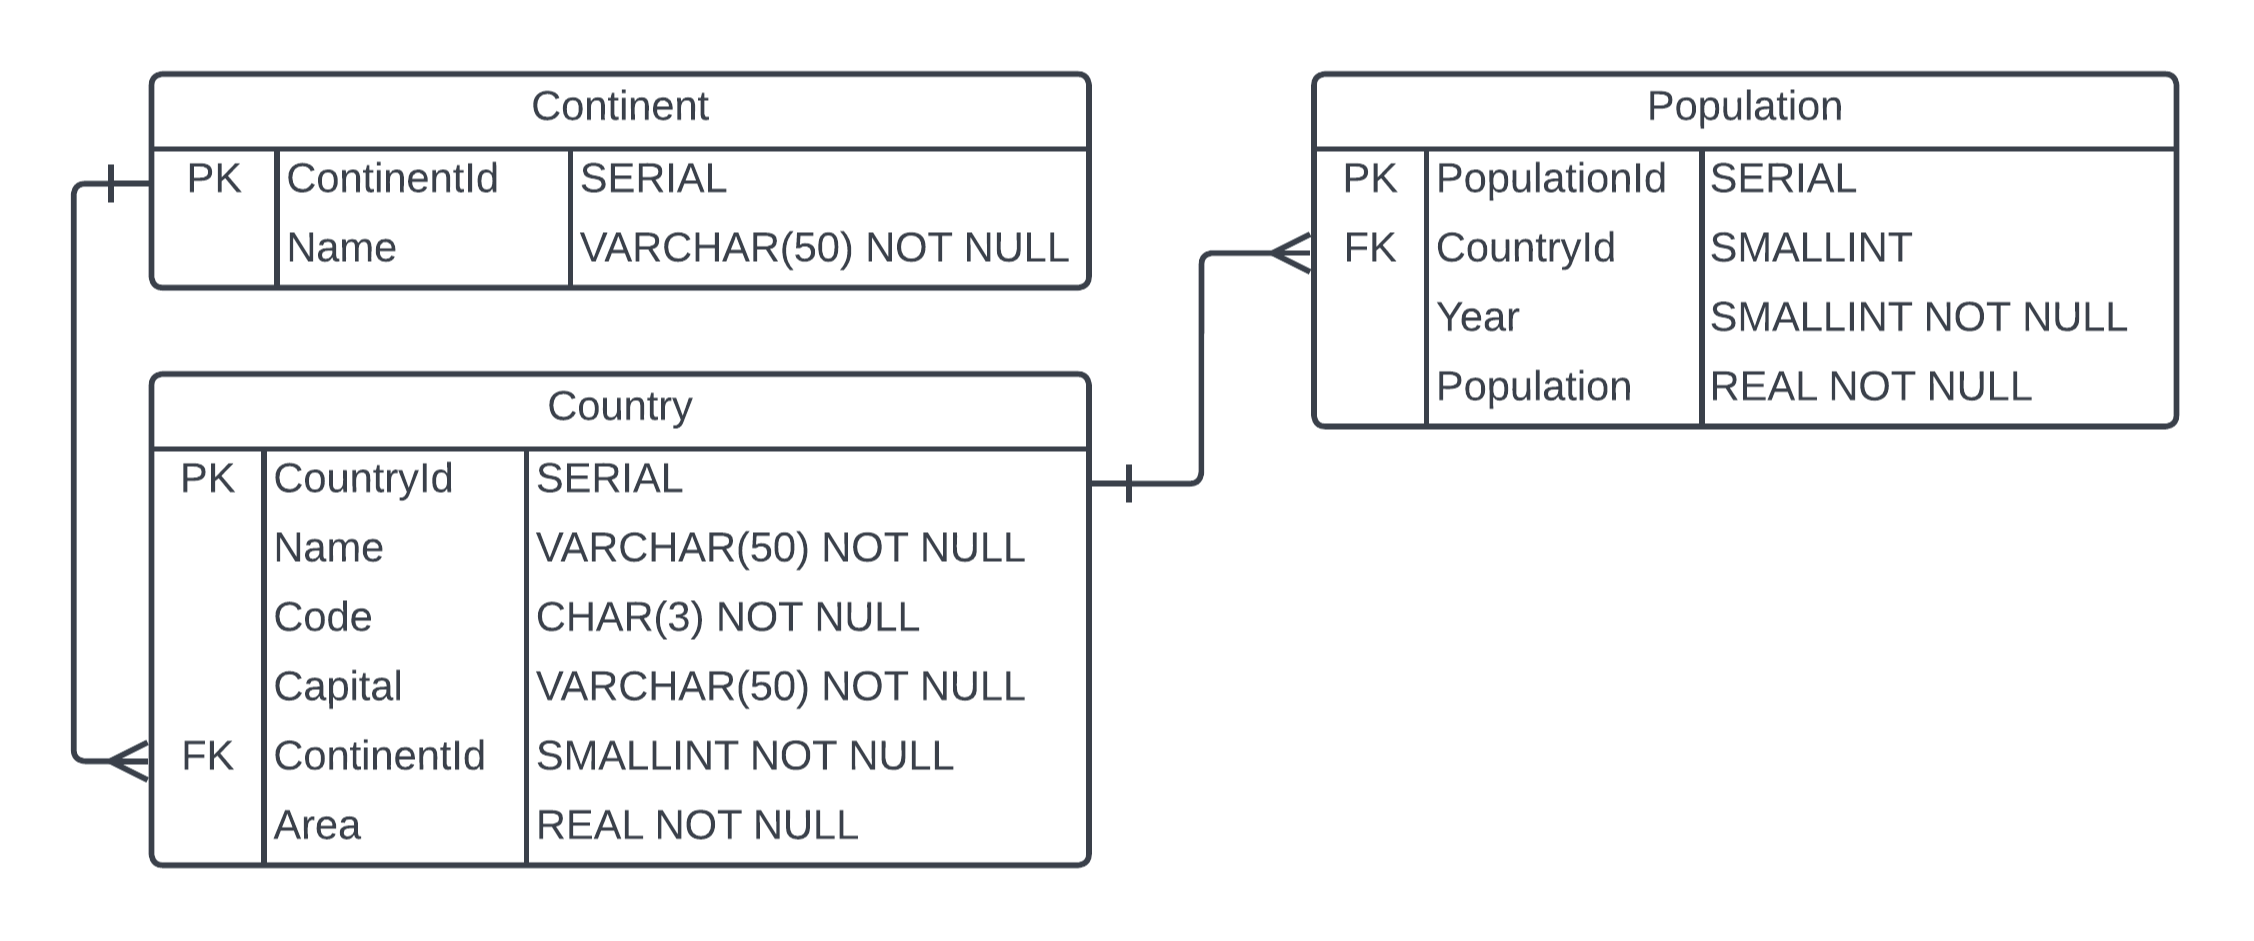

### 3. 
Formulate SQL statements that will create your proposed database and tables within PostgreSQL, including any required primary and foreign keys.

#### (a) List of dtabases

\l

#### (b) Creation of the "population" database

CREATE DATABASE population;

#### (c) Switch to the "population" database

\c population;

#### (d) Creating the "Continent" table

CREATE TABLE Continent (
    ContinentId SERIAL,
    Name VARCHAR(50) NOT NULL,
    PRIMARY KEY (ContinentId)
);

#### (e) Creating the "Country" table

CREATE TABLE Country (
    CountryId SERIAL,
    Name VARCHAR(50) NOT NULL,
    Code CHAR(3) NOT NULL,
    Capital VARCHAR(50) NOT NULL,
    ContinentId SMALLINT NOT NULL,
    Area REAL NOT NULL,
    PRIMARY KEY (CountryId),
    FOREIGN KEY (ContinentId) REFERENCES Continent(ContinentId)
);

#### (f) Creating the "Population" table

CREATE TABLE Population (
    PopulationId SERIAL,
    CountryId SMALLINT,
    Year SMALLINT NOT NULL,
    Population REAL NOT NULL,
    PRIMARY KEY (PopulationId),
    FOREIGN KEY (CountryId) REFERENCES Country(CountryId)
);

### (g) List of tables
\dt

### 4. 
Open your PostgreSQL psql terminal and execute the SQL statements you have written to create your proposed database within your PostgreSQL. <u>Do not populate the tables you have created with data from your data set as part of this step!!</u>

#### The following screenshot shows the execution of the above SQL commands.

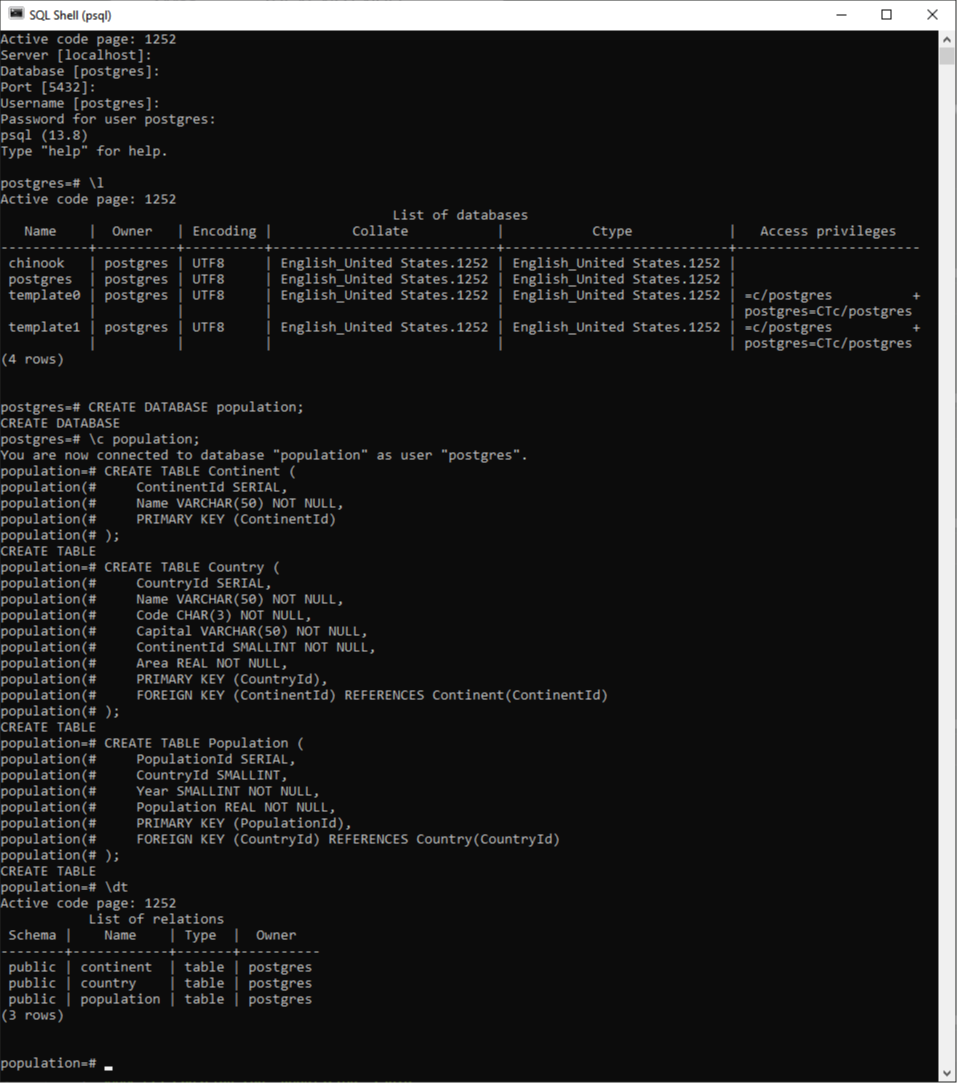

### 5. 
Connect to your PostgreSQL server from within your Jupyter Notebook environment and use your knowledge of Python, Pandas, and SQL to load your data set into your new PostgreSQL database. Be sure to include a query that verifies the successful execution of your SQL statements.

### Login to local server

In [100]:
# Login details to the local postgreSQL server
conn = psycopg2.connect(
    host="localhost",
    database="population",
    user="postgres",
    password="admin")

# Create a cursor object
cur = conn.cursor()

### Inserting data into tables

#### The Continent table

In [101]:
# Inserting data into the continent table
for idx, value in enumerate(df.Continent.unique()):
    cur.execute(f"INSERT INTO continent VALUES (%s, %s)", (idx, value))
    conn.commit()

In [102]:
# Validated data insertion into the continent table
cur.execute('SELECT * FROM continent')
query_results = cur.fetchall()
conn.commit()
for q in query_results:
    print(q)

(0, 'Asia')
(1, 'Europe')
(2, 'Africa')
(3, 'Oceania')
(4, 'North America')
(5, 'South America')


In [103]:
# The number of records
cur.execute('SELECT COUNT(*) FROM continent')
print(cur.fetchall())
conn.commit()

[(6,)]


#### The Country table

In [104]:
# Created dictionary with continents to replace in df.continent
keys = df.Continent.unique()
values = [i for i in range(len(keys))]
contDic = dict(zip(keys,values))
print(contDic)

{'Asia': 0, 'Europe': 1, 'Africa': 2, 'Oceania': 3, 'North America': 4, 'South America': 5}


In [105]:
# Replace Continent values using a dict
df.Continent.replace(contDic, inplace = True)

In [107]:
# Inserting data into the country table
for idx, row in df[['Country_Name', 'Country_Code', 'Capital', 'Continent', 'Area_(km²)']].iterrows():
    # print(f"idx = {idx}, {row['Country_Name']}, {row['Country_Code']}, {row['Capital']}, {row['Continent']}, {row['Area_(km²)']}")
    
    cur.execute("INSERT INTO country VALUES (%s, %s, %s, %s, %s, %s)", (idx, row['Country_Name'], row['Country_Code'], row['Capital'], row['Continent'], row['Area_(km²)']))
    conn.commit()

In [108]:
# Validated data insertion into the country table
cur.execute('SELECT * FROM country')
query_results = cur.fetchall()
conn.commit()
for q in query_results[:10]:
    print(q)

(0, 'Afghanistan', 'AFG', 'Kabul', 0, 652230.0)
(1, 'Albania', 'ALB', 'Tirana', 1, 28748.0)
(2, 'Algeria', 'DZA', 'Algiers', 2, 2381741.0)
(3, 'American Samoa', 'ASM', 'Pago Pago', 3, 199.0)
(4, 'Andorra', 'AND', 'Andorra la Vella', 1, 468.0)
(5, 'Angola', 'AGO', 'Luanda', 2, 1246700.0)
(6, 'Antigua and Barbuda', 'ATG', 'The Valley', 4, 91.0)
(7, 'Argentina', 'ARG', 'Buenos Aires', 5, 2780400.0)
(8, 'Armenia', 'ARM', 'Yerevan', 0, 29743.0)
(9, 'Aruba', 'ABW', 'Oranjestad', 4, 180.0)


In [109]:
# The number of records
cur.execute('SELECT COUNT(1) FROM country')
print(cur.fetchall())
conn.commit()

[(213,)]


#### The Population table

In [110]:
# Created dictionary with country to replace in df.Country_Name
keys = []
values = []
for idx, row in df[['Country_Name']].iterrows():
    keys.append(row['Country_Name'])
    values.append(idx)
    
countryDic = dict(zip(keys,values))

# for key, value in countryDic.items():
# 	print(key, ':', value)

In [111]:
# Replace Country_Name values using a dict
df.Country_Name.replace(countryDic, inplace = True)

In [112]:
# Column names from sub df
nameYear = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [113]:
# Inserting data into the population table
indexPopulation = 0
for idx, row in df[['Country_Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].iterrows():

    
    for i, r in enumerate(row[1:]):
        cur.execute("INSERT INTO population VALUES (%s, %s, %s, %s)", (indexPopulation, row['Country_Name'], nameYear[i], r))
        conn.commit()

        indexPopulation += 1


In [114]:
# Validation of data insertion into the population table
cur.execute('SELECT * FROM population')
query_results = cur.fetchall()
conn.commit()
for q in query_results[:10]:
    print(q)

(0, 0, 1960, 8996967.0)
(1, 0, 1961, 9169406.0)
(2, 0, 1962, 9351442.0)
(3, 0, 1963, 9543200.0)
(4, 0, 1964, 9744772.0)
(5, 0, 1965, 9956318.0)
(6, 0, 1966, 10174840.0)
(7, 0, 1967, 10399936.0)
(8, 0, 1968, 10637064.0)
(9, 0, 1969, 10893772.0)


In [115]:
# The number of records
cur.execute('SELECT COUNT(*) FROM population')
print(cur.fetchall())

[(13206,)]


In [116]:
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()

### 6. 
Using your knowledge of Python, Pandas, and PostgreSQL, read your dataset from your new PostgreSQL database into a new Pandas dataframe within your Jupyter Notebook, using whatever SQL statements and Python logic you believe to be appropriate.

### Login to local server

In [117]:
# Login details to the local postgreSQL server
conn = psycopg2.connect(
    host="localhost",
    database="population",
    user="postgres",
    password="admin")

# Create a cursor object
cur = conn.cursor()

In [118]:
# create a Pandas dataframe using the content of SQL statement
df = pd.read_sql_query("""
SELECT
    c.name AS Country_Name,
    c.code AS Country_Code,
    c.capital AS Capital,
    continent.name AS Continent,
    c.area,
    p1960.population AS Pop1960, p1961.population AS Pop1961, p1962.population AS Pop1962, p1963.population AS Pop1963, p1964.population AS Pop1964, p1965.population AS Pop1965, p1966.population AS Pop1966, p1967.population AS Pop1967, p1968.population AS Pop1968, p1969.population AS Pop1969, p1970.population AS Pop1970, p1971.population AS Pop1971, p1972.population AS Pop1972, p1973.population AS Pop1973, p1974.population AS Pop1974, p1975.population AS Pop1975, p1976.population AS Pop1976, p1977.population AS Pop1977, p1978.population AS Pop1978, p1979.population AS Pop1979, p1980.population AS Pop1980, p1981.population AS Pop1981, p1982.population AS Pop1982, p1983.population AS Pop1983, p1984.population AS Pop1984, p1985.population AS Pop1985, p1986.population AS Pop1986, p1987.population AS Pop1987, p1988.population AS Pop1988, p1989.population AS Pop1989, p1990.population AS Pop1990, p1991.population AS Pop1991, p1992.population AS Pop1992, p1993.population AS Pop1993, p1994.population AS Pop1994, p1995.population AS Pop1995, p1996.population AS Pop1996, p1997.population AS Pop1997, p1998.population AS Pop1998, p1999.population AS Pop1999, p2000.population AS Pop2000, p2001.population AS Pop2001, p2002.population AS Pop2002, p2003.population AS Pop2003, p2004.population AS Pop2004, p2005.population AS Pop2005, p2006.population AS Pop2006, p2007.population AS Pop2007, p2008.population AS Pop2008, p2009.population AS Pop2009, p2010.population AS Pop2010, p2011.population AS Pop2011, p2012.population AS Pop2012, p2013.population AS Pop2013, p2014.population AS Pop2014, p2015.population AS Pop2015, p2016.population AS Pop2016, p2017.population AS Pop2017, p2018.population AS Pop2018, p2019.population AS Pop2019, p2020.population AS Pop2020, p2021.population AS Pop2021
FROM
    country c
LEFT JOIN continent ON c.continentid = continent.continentid
INNER JOIN population p1960 on c.countryid = p1960.countryid
INNER JOIN population p1961 on c.countryid = p1961.countryid
INNER JOIN population p1962 on c.countryid = p1962.countryid
INNER JOIN population p1963 on c.countryid = p1963.countryid
INNER JOIN population p1964 on c.countryid = p1964.countryid
INNER JOIN population p1965 on c.countryid = p1965.countryid
INNER JOIN population p1966 on c.countryid = p1966.countryid
INNER JOIN population p1967 on c.countryid = p1967.countryid
INNER JOIN population p1968 on c.countryid = p1968.countryid
INNER JOIN population p1969 on c.countryid = p1969.countryid
INNER JOIN population p1970 on c.countryid = p1970.countryid
INNER JOIN population p1971 on c.countryid = p1971.countryid
INNER JOIN population p1972 on c.countryid = p1972.countryid
INNER JOIN population p1973 on c.countryid = p1973.countryid
INNER JOIN population p1974 on c.countryid = p1974.countryid
INNER JOIN population p1975 on c.countryid = p1975.countryid
INNER JOIN population p1976 on c.countryid = p1976.countryid
INNER JOIN population p1977 on c.countryid = p1977.countryid
INNER JOIN population p1978 on c.countryid = p1978.countryid
INNER JOIN population p1979 on c.countryid = p1979.countryid
INNER JOIN population p1980 on c.countryid = p1980.countryid
INNER JOIN population p1981 on c.countryid = p1981.countryid
INNER JOIN population p1982 on c.countryid = p1982.countryid
INNER JOIN population p1983 on c.countryid = p1983.countryid
INNER JOIN population p1984 on c.countryid = p1984.countryid
INNER JOIN population p1985 on c.countryid = p1985.countryid
INNER JOIN population p1986 on c.countryid = p1986.countryid
INNER JOIN population p1987 on c.countryid = p1987.countryid
INNER JOIN population p1988 on c.countryid = p1988.countryid
INNER JOIN population p1989 on c.countryid = p1989.countryid
INNER JOIN population p1990 on c.countryid = p1990.countryid
INNER JOIN population p1991 on c.countryid = p1991.countryid
INNER JOIN population p1992 on c.countryid = p1992.countryid
INNER JOIN population p1993 on c.countryid = p1993.countryid
INNER JOIN population p1994 on c.countryid = p1994.countryid
INNER JOIN population p1995 on c.countryid = p1995.countryid
INNER JOIN population p1996 on c.countryid = p1996.countryid
INNER JOIN population p1997 on c.countryid = p1997.countryid
INNER JOIN population p1998 on c.countryid = p1998.countryid
INNER JOIN population p1999 on c.countryid = p1999.countryid
INNER JOIN population p2000 on c.countryid = p2000.countryid
INNER JOIN population p2001 on c.countryid = p2001.countryid
INNER JOIN population p2002 on c.countryid = p2002.countryid
INNER JOIN population p2003 on c.countryid = p2003.countryid
INNER JOIN population p2004 on c.countryid = p2004.countryid
INNER JOIN population p2005 on c.countryid = p2005.countryid
INNER JOIN population p2006 on c.countryid = p2006.countryid
INNER JOIN population p2007 on c.countryid = p2007.countryid
INNER JOIN population p2008 on c.countryid = p2008.countryid
INNER JOIN population p2009 on c.countryid = p2009.countryid
INNER JOIN population p2010 on c.countryid = p2010.countryid
INNER JOIN population p2011 on c.countryid = p2011.countryid
INNER JOIN population p2012 on c.countryid = p2012.countryid
INNER JOIN population p2013 on c.countryid = p2013.countryid
INNER JOIN population p2014 on c.countryid = p2014.countryid
INNER JOIN population p2015 on c.countryid = p2015.countryid
INNER JOIN population p2016 on c.countryid = p2016.countryid
INNER JOIN population p2017 on c.countryid = p2017.countryid
INNER JOIN population p2018 on c.countryid = p2018.countryid
INNER JOIN population p2019 on c.countryid = p2019.countryid
INNER JOIN population p2020 on c.countryid = p2020.countryid
INNER JOIN population p2021 on c.countryid = p2021.countryid
WHERE
    p1960.year = 1960 AND p1961.year = 1961 AND p1962.year = 1962 AND p1963.year = 1963 AND p1964.year = 1964 AND p1965.year = 1965 AND p1966.year = 1966 AND p1967.year = 1967 AND p1968.year = 1968 AND p1969.year = 1969 AND p1970.year = 1970 AND p1971.year = 1971 AND p1972.year = 1972 AND p1973.year = 1973 AND p1974.year = 1974 AND p1975.year = 1975 AND p1976.year = 1976 AND p1977.year = 1977 AND p1978.year = 1978 AND p1979.year = 1979 AND p1980.year = 1980 AND p1981.year = 1981 AND p1982.year = 1982 AND p1983.year = 1983 AND p1984.year = 1984 AND p1985.year = 1985 AND p1986.year = 1986 AND p1987.year = 1987 AND p1988.year = 1988 AND p1989.year = 1989 AND p1990.year = 1990 AND p1991.year = 1991 AND p1992.year = 1992 AND p1993.year = 1993 AND p1994.year = 1994 AND p1995.year = 1995 AND p1996.year = 1996 AND p1997.year = 1997 AND p1998.year = 1998 AND p1999.year = 1999 AND p2000.year = 2000 AND p2001.year = 2001 AND p2002.year = 2002 AND p2003.year = 2003 AND p2004.year = 2004 AND p2005.year = 2005 AND p2006.year = 2006 AND p2007.year = 2007 AND p2008.year = 2008 AND p2009.year = 2009 AND p2010.year = 2010 AND p2011.year = 2011 AND p2012.year = 2012 AND p2013.year = 2013 AND p2014.year = 2014 AND p2015.year = 2015 AND p2016.year = 2016 AND p2017.year = 2017 AND p2018.year = 2018 AND p2019.year = 2019 AND p2020.year = 2020 AND p2021.year = 2021;
 """, conn)

In [120]:
# Close the cursor and connection to so the server can allocate
# bandwidth to other requests
cur.close()
conn.close()

In [121]:
# Edit the name of all the columns
df.rename(columns = {'country_name':'Country_Name','country_code':'Country_Code','capital':'Capital','continent':'Continent','area':'Area_(km²)','pop1960':'1960','pop1961':'1961','pop1962':'1962','pop1963':'1963','pop1964':'1964','pop1965':'1965','pop1966':'1966','pop1967':'1967','pop1968':'1968','pop1969':'1969','pop1970':'1970','pop1971':'1971','pop1972':'1972','pop1973':'1973','pop1974':'1974','pop1975':'1975','pop1976':'1976','pop1977':'1977','pop1978':'1978','pop1979':'1979','pop1980':'1980','pop1981':'1981','pop1982':'1982','pop1983':'1983','pop1984':'1984','pop1985':'1985','pop1986':'1986','pop1987':'1987','pop1988':'1988','pop1989':'1989','pop1990':'1990','pop1991':'1991','pop1992':'1992','pop1993':'1993','pop1994':'1994','pop1995':'1995','pop1996':'1996','pop1997':'1997','pop1998':'1998','pop1999':'1999','pop2000':'2000','pop2001':'2001','pop2002':'2002','pop2003':'2003','pop2004':'2004','pop2005':'2005','pop2006':'2006','pop2007':'2007','pop2008':'2008','pop2009':'2009','pop2010':'2010','pop2011':'2011','pop2012':'2012','pop2013':'2013','pop2014':'2014','pop2015':'2015','pop2016':'2016','pop2017':'2017','pop2018':'2018','pop2019':'2019','pop2020':'2020','pop2021':'2021',},inplace = True)

In [122]:
# Dataset head
df.head()

,Country_Name,Country_Code,Capital,Continent,Area_(km²),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Kabul,Asia,652230.0,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,11173654.0,11475450.0,11791222.0,12108963.0,12412960.0,12689164.0,12943093.0,13171294.0,13341199.0,13411060.0,13356500.0,13171679.0,12882518.0,12537732.0,12204306.0,11938204.0,11736177.0,11604538.0,11618008.0,11868873.0,12412311.0,13299016.0,14485543.0,15816601.0,17075728.0,18110662.0,18853444.0,19357126.0,19737770.0,20170848.0,20779956.0,21606992.0,22600774.0,23680872.0,24726688.0,25654274.0,26433058.0,27100542.0,27722280.0,28394806.0,29185512.0,30117412.0,31161378.0,32269592.0,33370804.0,34413604.0,35383028.0,36296112.0,37171920.0,38041756.0,38928340.0,39835428.0
1,Albania,ALB,Tirana,Europe,28748.0,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,2837849.0,2811666.0
2,Algeria,DZA,Algiers,Africa,2381741.0,11057864.0,11336336.0,11619828.0,11912800.0,12221675.0,12550880.0,12902626.0,13275020.0,13663581.0,14061724.0,14464992.0,14872253.0,15285992.0,15709831.0,16149018.0,16607706.0,17085800.0,17582900.0,18102266.0,18647800.0,19221660.0,19824296.0,20452900.0,21101876.0,21763578.0,22431508.0,23102386.0,23774288.0,24443472.0,25106192.0,25758872.0,26400468.0,27028330.0,27635516.0,28213776.0,28757788.0,29266416.0,29742980.0,30192750.0,30623406.0,31042238.0,31451512.0,31855110.0,32264160.0,32692152.0,33149720.0,33641008.0,34166976.0,34730604.0,35333880.0,35977452.0,36661440.0,37383900.0,38140136.0,38923688.0,39728020.0,40551400.0,41389176.0,42228416.0,43053056.0,43851044.0,44616624.0
3,American Samoa,ASM,Pago Pago,Oceania,199.0,20127.0,20605.0,21246.0,22029.0,22850.0,23675.0,24473.0,25235.0,25980.0,26698.0,27362.0,27982.0,28564.0,29103.0,29595.0,30045.0,30455.0,30834.0,31262.0,31842.0,32648.0,33697.0,34969.0,36413.0,37946.0,39521.0,41114.0,42741.0,44346.0,45894.0,47351.0,48682.0,49900.0,51025.0,52099.0,53158.0,54209.0,55227.0,56180.0,57049.0,57816.0,58496.0,59077.0,59495.0,59684.0,59557.0,59109.0,58367.0,57490.0,56675.0,56084.0,55755.0,55669.0,55717.0,55791.0,55806.0,55739.0,55617.0,55461.0,55312.0,55197.0,55103.0
4,Andorra,AND,Andorra la Vella,Europe,468.0,13410.0,14378.0,15379.0,16407.0,17466.0,18542.0,19646.0,20760.0,21886.0,23053.0,24275.0,25571.0,26885.0,28232.0,29515.0,30705.0,31782.0,32769.0,33744.0,34825.0,36063.0,37498.0,39115.0,40854.0,42706.0,44593.0,46520.0,48459.0,50433.0,52452.0,54508.0,56666.0,58882.0,60974.0,62676.0,63860.0,64363.0,64318.0,64140.0,64368.0,65390.0,67344.0,70048.0,73180.0,76250.0,78871.0,80995.0,82682.0,83860.0,84461.0,84454.0,83748.0,82427.0,80770.0,79213.0,77993.0,77295.0,76997.0,77008.0,77146.0,77265.0,77354.0


In [123]:
# Dataframe shape
df.shape

(213, 67)

In [124]:
# Column names
df.columns

Index(['Country_Name', 'Country_Code', 'Capital', 'Continent', 'Area_(km²)',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

## Part 4: 
Exploratory Data Analysis (EDA) (20 Points) – Using your newly created dataframe (see Part 3, #6), provide summary statistics for each attribute within the dataframe. Provide appropriate graphical analysis for each attribute using basic Pandas graphics. Include a narrative describing your EDA findings, i.e., what have you learned from your summary statistics and graphics? Be sure include any Python code used as part of your EDA work.

In [4]:
# Summary statistics for each attribute
df.describe()


,Area_(km²),1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.120000e+02,2.120000e+02,2.120000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02
mean,6.311113e+05,1.409999e+07,1.428133e+07,1.452600e+07,1.482749e+07,1.513072e+07,1.544047e+07,1.576488e+07,1.608803e+07,1.641790e+07,1.675912e+07,1.710796e+07,1.747216e+07,1.782628e+07,1.817903e+07,1.852904e+07,1.887203e+07,1.920971e+07,1.954469e+07,1.988531e+07,2.023456e+07,2.058711e+07,2.094892e+07,2.132474e+07,2.170394e+07,2.208191e+07,2.246709e+07,2.286380e+07,2.327114e+07,2.368271e+07,2.409401e+07,2.450236e+07,2.490990e+07,2.541972e+07,2.581607e+07,2.620725e+07,2.647612e+07,2.686009e+07,2.724300e+07,2.762253e+07,2.799709e+07,2.836814e+07,2.873664e+07,2.910417e+07,2.947218e+07,2.984274e+07,3.021570e+07,3.059215e+07,3.097079e+07,3.135554e+07,3.173896e+07,3.212102e+07,3.250113e+07,3.289772e+07,3.329778e+07,3.369846e+07,3.409674e+07,3.449583e+07,3.489380e+07,3.528078e+07,3.565734e+07,3.602949e+07,3.636721e+07
std,1.837701e+06,5.784412e+07,5.791724e+07,5.865092e+07,5.998061e+07,6.129298e+07,6.265650e+07,6.420046e+07,6.569865e+07,6.725319e+07,6.891022e+07,7.063336e+07,7.241448e+07,7.410821e+07,7.576271e+07,7.734924e+07,7.882174e+07,8.021071e+07,8.153263e+07,8.286835e+07,8.423114e+07,8.557955e+07,8.697198e+07,8.849299e+07,9.002544e+07,9.150815e+07,9.303601e+07,9.465028e+07,9.634675e+07,9.806622e+07,9.976164e+07,1.014372e+08,1.030739e+08,1.048769e+08,1.064119e+08,1.079465e+08,1.092238e+08,1.107324e+08,1.122402e+08,1.137183e+08,1.151438e+08,1.165235e+08,1.178649e+08,1.191707e+08,1.204462e+08,1.217061e+08,1.229631e+08,1.242037e+08,1.254212e+08,1.266271e+08,1.278103e+08,1.289684e+08,1.301440e+08,1.313920e+08,1.326194e+08,1.338174e+08,1.349794e+08,1.361318e+08,1.372965e+08,1.383623e+08,1.393454e+08,1.402615e+08,1.410461e+08
min,2.000000e+00,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,5.707000e+03,5.770000e+03,5.786000e+03,5.819000e+03,5.903000e+03,6.064000e+03,6.319000e+03,6.650000e+03,7.018000e+03,7.357000e+03,7.631000e+03,7.825000e+03,7.951000e+03,8.041000e+03,8.110000e+03,8.211000e+03,8.341000e+03,8.481000e+03,8.637000e+03,8.787000e+03,8.910000e+03,9.014000e+03,9.110000e+03,9.194000e+03,9.259000e+03,9.298000e+03,9.317000e+03,9.328000e+03,9.332000e+03,9.344000e+03,9.392000e+03,9.478000e+03,9.593000e+03,9.724000e+03,9.871000e+03,9.848000e+03,9.827000e+03,9.846000e+03,9.880000e+03,9.945000e+03,1.000900e+04,1.006900e+04,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04
25%,1.099100e+04,2.309850e+05,2.317180e+05,2.345520e+05,2.405290e+05,2.469610e+05,2.539930e+05,2.616640e+05,2.699440e+05,2.787310e+05,2.878860e+05,2.973070e+05,2.988520e+05,3.024500e+05,3.022000e+05,3.019960e+05,3.042220e+05,3.057740e+05,3.069700e+05,3.234680e+05,3.428040e+05,3.595310e+05,3.652250e+05,3.655250e+05,3.656220e+05,3.659980e+05,3.708860e+05,3.977390e+05,4.221540e+05,4.

#### Here 
- count shows the total number of datapoints.
- mean and std are mean and standard deviation for those columns.
- 25% is the value below which we have 25% of data. Also known as Lower or first Quartile (Q1).
- 50% is the value below which we have 50% of the data. Also known as Median (Q2).
- 75% is the value below which we have 75% of the data. Alos known as Upper Quartile (Q3).
- max is the max value present in that column.


### Plots

In [5]:
# numeric columns
numeric_cols = df.select_dtypes(["int64","float64"]).columns
numeric_cols

Index(['Area_(km²)', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

<AxesSubplot:>

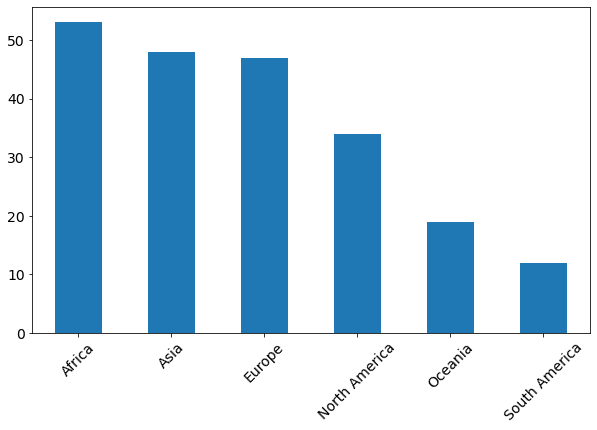

In [318]:
df["Continent"].value_counts().plot(kind='bar', fontsize=14, rot=45, figsize=(10,6))

**The graph above shows the number of countries in each continent in our data.**

<AxesSubplot:title={'center':"World's population since 1960"}>

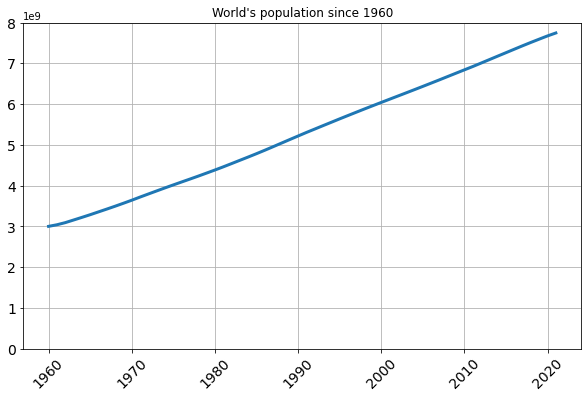

In [6]:
df[['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].sum().plot(kind='line', title ="World's population since 1960", ylim=(0,8e9), fontsize=14, rot=45, grid=True, lw=3, figsize=(10,6))



#### **The given graph shows the development of the world's population from 1960 to 2021.**

<AxesSubplot:title={'center':'Population development on individual continents since 1960'}>

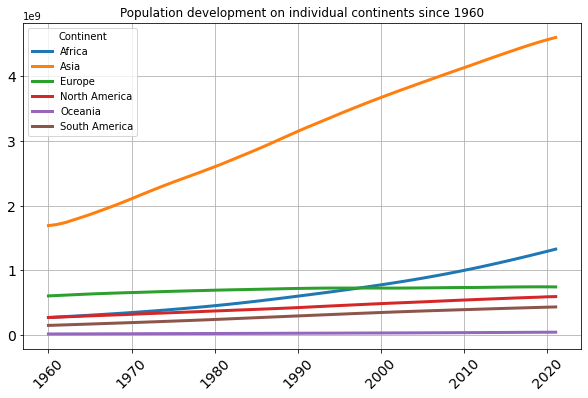

In [7]:
df[['Continent','1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].groupby(['Continent']).sum().T.plot(kind='line', fontsize=14, title ="Population development on individual continents since 1960", rot=45, grid=True, lw=3, figsize=(10,6))

#### **The given graph shows the development of the population on individual continents since 1960. You may see the population explosion in Asia and Africa. On the contrary, the population in Europe, North America, South America, and Oceania has a gradual increase or even stagnation.**

<AxesSubplot:title={'center':'Population on individual continents in 2021'}, xlabel='Continent'>

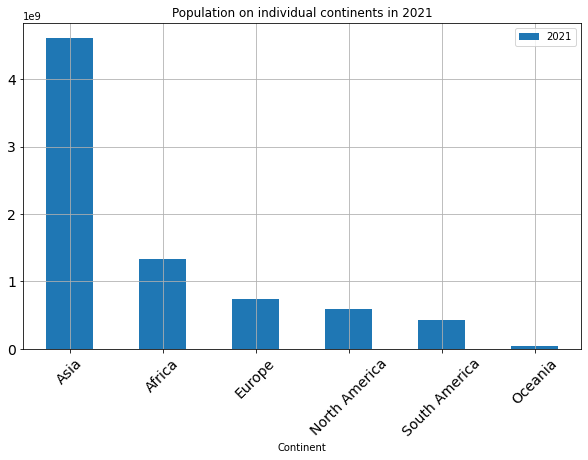

In [8]:
df[['Continent','2021']].groupby(['Continent']).sum().sort_values(by=['2021'], ascending=False).plot(kind='bar', fontsize=14, title ="Population on individual continents in 2021", rot=45, grid=True, lw=3, figsize=(10,6))

In [9]:
df[['Continent','2021']].groupby(['Continent']).sum().sort_values(by=['2021'], ascending=False)

,2021
Continent,
Asia,4602550691
Africa,1328041637
Europe,743888262
North America,594196497
South America,434153084
Oceania,43385706


#### **From the graph and table above, it is evident that Asia with 4.6 billion inhabitants is the most numerous continent, followed by Africa with 1.32 billion inhabitants.**

In [4]:
# numeric columns
numeric_cols = df.select_dtypes(["int64","float64"]).columns
numeric_cols

Index(['Area_(km²)', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

#### **The below graphs present the population for each year. Where it can be seen that for a few countries the population is very large compared to others. Thus, being represented as outliers.**

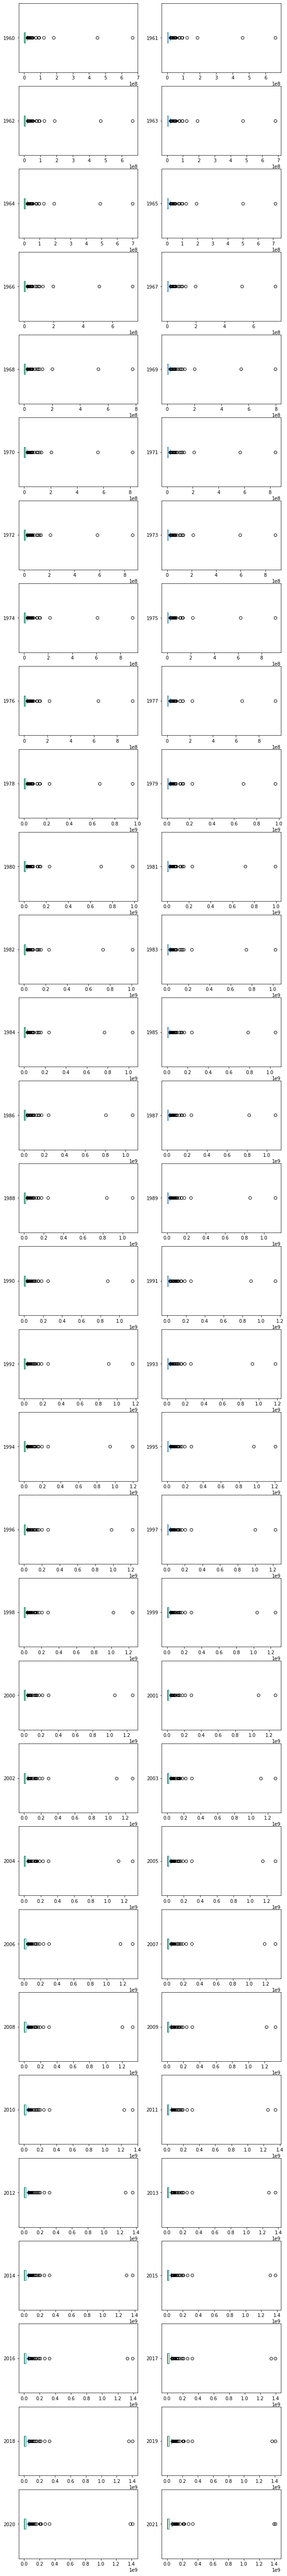

In [10]:
nrow = (len(numeric_cols)//2)
ncol = 2
fig, axes = plt.subplots(nrow, ncol)

count = 1
for r in range(nrow):
    for c in range(ncol):
        if count < len(numeric_cols):
            df[numeric_cols[count]].plot(kind = "box",ax=axes[r,c],figsize=(10,100),vert=False)
            count += 1

<AxesSubplot:title={'center':'Area of individual continents'}, xlabel='Continent'>

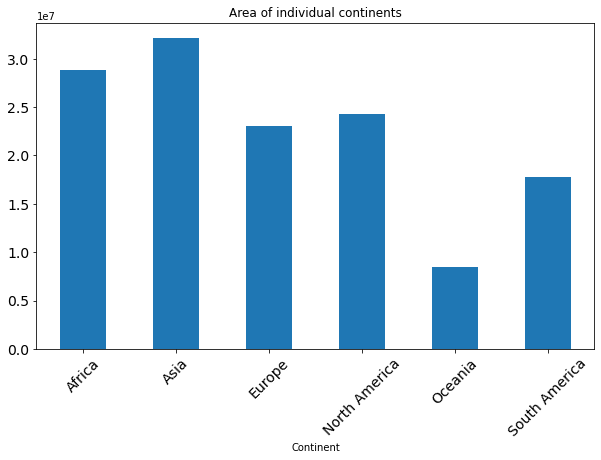

In [11]:
df.groupby(["Continent"])["Area_(km²)"].sum().plot(kind='bar', fontsize=14, title="Area of individual continents", rot=45, figsize=(10,6))

#### **The graph above shows the area in $km^2$ for each of the continent.**

<AxesSubplot:xlabel='Country_Name'>

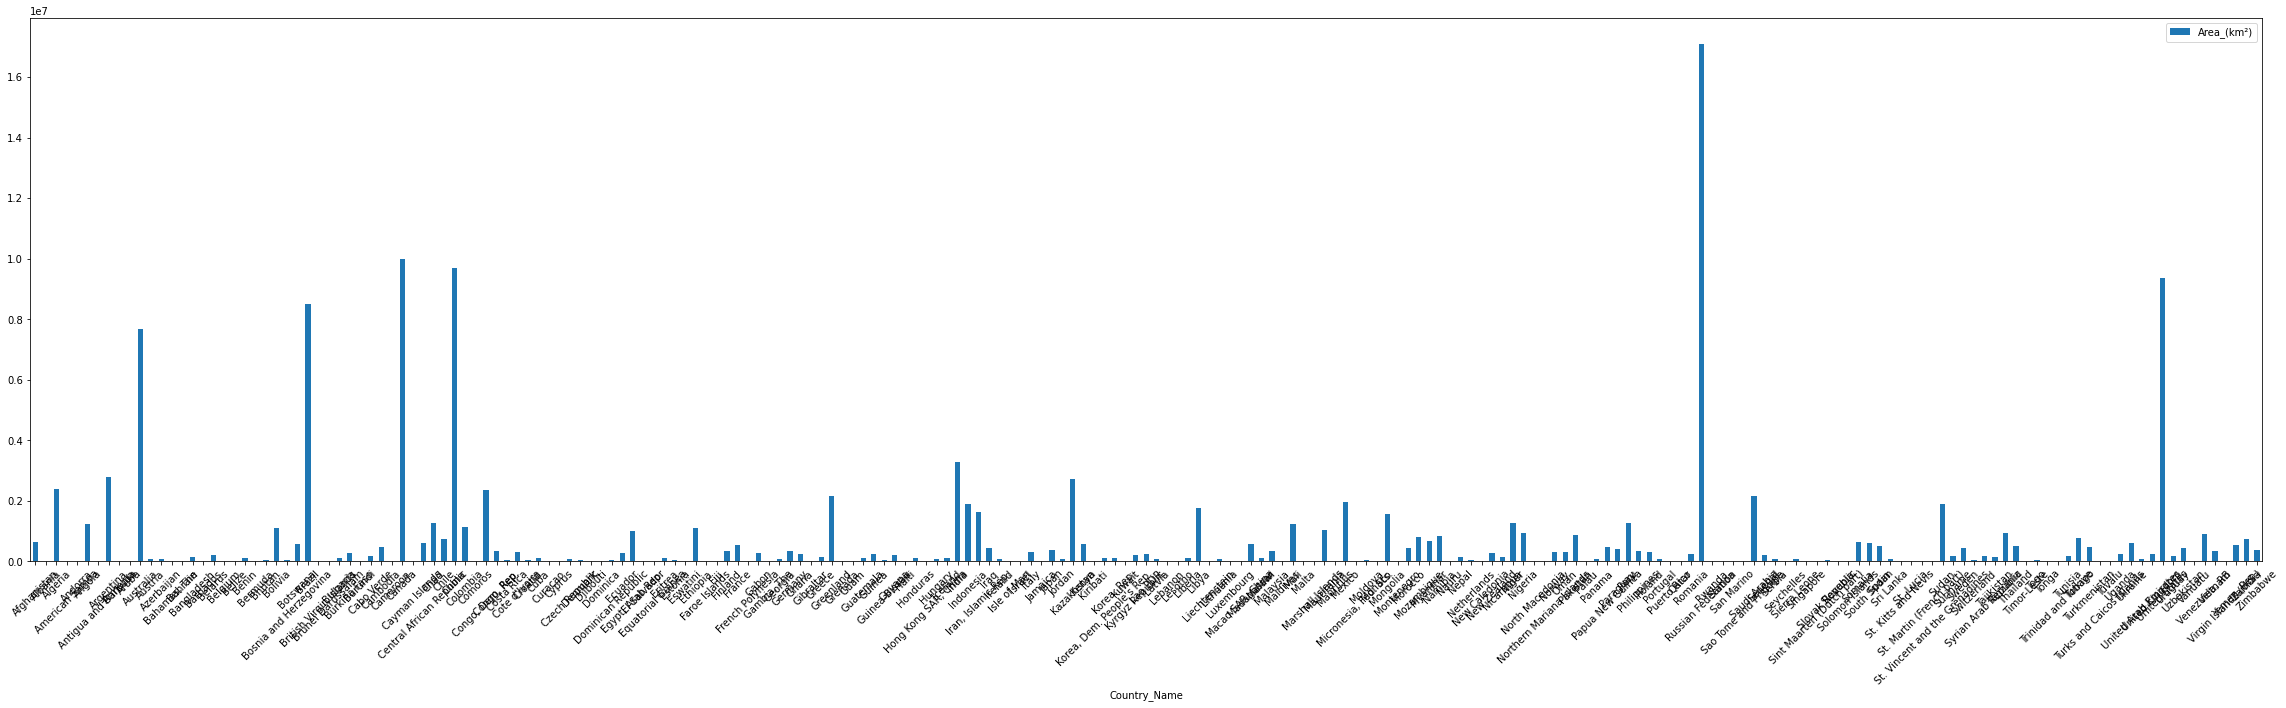

In [13]:
df.plot(x = "Country_Name",y= ["Area_(km²)"], kind="bar", rot=45, figsize=(40,10))

#### **The graph above shows the area in $km^2$ for each country and it can be seen from this graph and the one below that though the area for most of the countries is not very large there are a few outliers present for which the area value is too large.**

<AxesSubplot:>

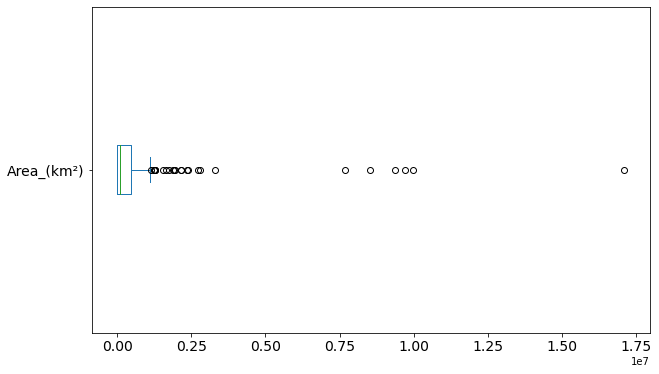

In [14]:
df["Area_(km²)"].plot(kind="box", fontsize=14, vert=False, figsize=(10, 6))

## Part 5: 
Inference (20 Points) – Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic. Include a narrative explaining your research approach and findings and be sure include any Python code used as part of your work.

####  1. Which twenty countries are most populous in the world?

In [6]:
data0 = df.sort_values(by="2021",ascending=False)[["Country_Name","2021"]].reset_index().drop("index",axis=1).head(20)
data0

,Country_Name,2021
0,China,1412360000
1,India,1393409033
2,United States,331893745
3,Indonesia,276361788
4,Pakistan,225199929
5,Brazil,213993441
6,Nigeria,211400704
7,Bangladesh,166303494
8,Russian Federation,143446060
9,Mexico,130262220


<AxesSubplot:title={'center':'The twenty most populous countries in the world in 2021'}, xlabel='Country_Name'>

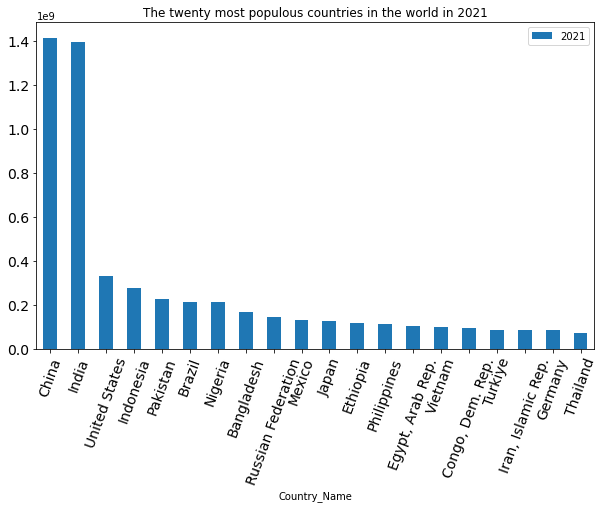

In [7]:
data0.plot(x = 'Country_Name', y = '2021', kind="bar", fontsize=14, title="The twenty most populous countries in the world in 2021", rot=70, figsize=(10,6))

#### 2.  Which twenty countries have the highest population growth?

In [9]:
# Calculating population growth from 1960 to 2021
data1 = df[["Country_Name","2020","2021"]]
data1["Population_Growth"] = (data1["2021"] - data1["2020"])/data1["2020"] * 100
data1 = data1.sort_values(by="Population_Growth",ascending=False).head(20).reset_index().drop("index",axis=1)
data1

,Country_Name,2020,2021,Population_Growth
0,Syrian Arab Republic,17500657,18275704,4.428674
1,Niger,24206636,25130810,3.817854
2,Equatorial Guinea,1402985,1449891,3.343300
3,Angola,32866268,33933611,3.247533
4,"Congo, Dem. Rep.",89561404,92377986,3.144861
5,Burundi,11890781,12255429,3.066645
6,Uganda,45741000,47123533,3.022525
7,Mali,20250834,20855724,2.986988
8,Chad,16425859,16914985,2.977780
9,Tanzania,59734213,61498438,2.953458


<AxesSubplot:title={'center':'The twenty countries with the highest relative population growth in 2021'}, xlabel='Country_Name'>

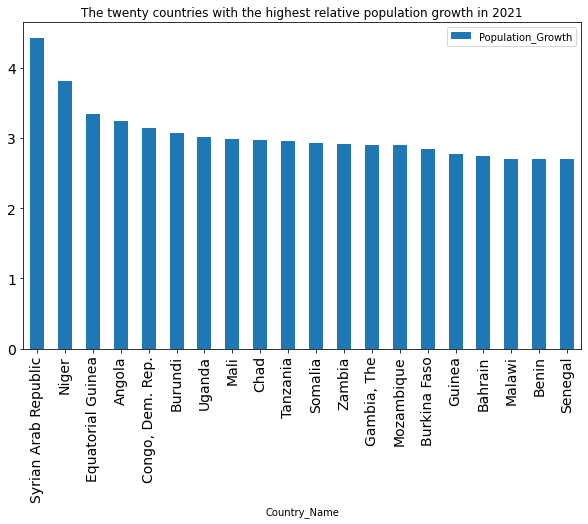

In [10]:
data1.plot(x = 'Country_Name', y = 'Population_Growth', kind="bar", fontsize=14, title="The twenty countries with the highest relative population growth in 2021", figsize=(10,6))

#### **From the table above, it is evident that out of the 20 countries having the highest population growth, the Syrian Arab Republic, Niger, and Equatorial Guinea are countries with the highest population growth rate in the world.**

#### 3. What is the population growth or decline of the 20 most populous countries?

In [19]:
# Calculating growth/decline rate from 1960 to 2021 by (population in 2021-population in 1960)/(populating in 1960)

data2 = df[df["Country_Name"].isin(list(data0["Country_Name"]))][["Country_Name","2020","2021"]]

data2["Growth/Decline_Rate"] = (data2["2021"]-data2["2020"])/data2["2020"] * 100

data2 = data2.sort_values(by="Growth/Decline_Rate",ascending=False).reset_index().drop("index",axis=1)
data2

,Country_Name,2020,2021,Growth/Decline_Rate
0,"Congo, Dem. Rep.",89561404,92377986,3.144861
1,Nigeria,206139587,211400704,2.552211
2,Ethiopia,114963583,117876226,2.533535
3,Pakistan,220892331,225199929,1.950089
4,"Egypt, Arab Rep.",102334403,104258327,1.880036
5,Philippines,109581085,111046910,1.337662
6,"Iran, Islamic Rep.",83992953,85028760,1.233207
7,Indonesia,273523621,276361788,1.037631
8,Mexico,128932753,130262220,1.031132
9,Bangladesh,164689383,166303494,0.980094


<AxesSubplot:title={'center':'Population Growth Rate 2021'}, xlabel='Country_Name'>

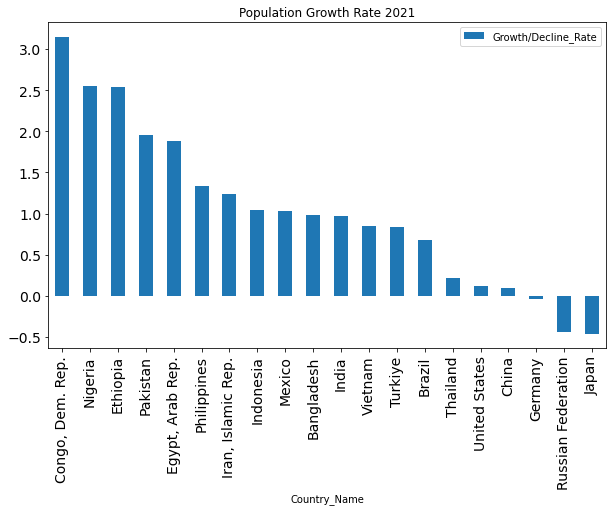

In [20]:
data2.plot(x = 'Country_Name', y = 'Growth/Decline_Rate', kind="bar", title = 'Population Growth Rate 2021',fontsize=14, figsize=(10,6))

#### **It can be seen from the two tables above that although China has the highest population in the world in 2021 Congo, Dem. Rep has the highest growth rate. These two countries belong to the group of twenty most populous countries in the world.**

#### 4. Which twenty countries have the highest population density?

In [21]:
# Calclating population density in 2021
data3 = df[["Country_Name","Area_(km²)","2021"]]
data3["Population_density"] = data3["2021"]/data3["Area_(km²)"]
data3 = data3.sort_values(by="Population_density",ascending=False).reset_index().drop("index",axis=1).head(20)
data3

,Country_Name,Area_(km²),2021,Population_density
0,"Macao SAR, China",30,658391,21946.366667
1,Monaco,2,39520,19760.000000
2,Singapore,710,5453566,7681.078873
3,Cameroon,4033,27224262,6750.374907
4,"Hong Kong SAR, China",1104,7413100,6714.764493
5,Gibraltar,6,33691,5615.166667
6,Bahrain,765,1748295,2285.352941
7,Maldives,300,543620,1812.066667
8,Malta,316,516869,1635.661392
9,Sint Maarten (Dutch part),34,42846,1260.176471


<AxesSubplot:title={'center':'Population density 2021'}, xlabel='Country_Name'>

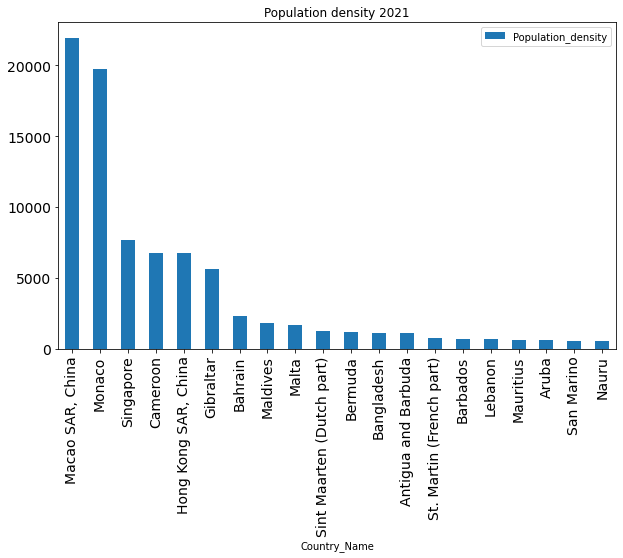

In [22]:
data3.plot(x = 'Country_Name', y = 'Population_density', kind="bar", title = 'Population density 2021',fontsize=14, figsize=(10,6))

#### **The table above shows the countries with highest population density.**

#### 5. Which country belongs to both lists of the twenty countries with the highest population growth and the highest population density?

In [23]:
highest_pop_growth_countries = list(data1["Country_Name"])
highest_pop_density_countries = list(data3["Country_Name"])

common_countries = list(set(highest_pop_growth_countries).intersection(set(highest_pop_density_countries)))
common_countries

['Bahrain']

#### 6. What was the world's population growth rate in % every year since 1960?

In [24]:
# Calculating growth rate in % of world's population each year from 1960-2021

data4 = df.drop(["Country_Name","Country_Code","Capital","Continent","Area_(km²)"],axis=1)

data4 = pd.DataFrame(data4.sum(axis=0),columns=["World_population"])
data4["Growth_rate_in%"] = 0.0

# data4["Growth_rate_in%"] = data4["World_population"].diff / data4["World_population"]
for i in range(1,len(data4)):
    data4["Growth_rate_in%"][i] = (data4["World_population"][i] - data4["World_population"][i-1])/data4["World_population"][i-1]*100

data4

,World_population,Growth_rate_in%
1960,3.003298e+09,0.000000
1961,3.041923e+09,1.286076
1962,3.094037e+09,1.713211
1963,3.158256e+09,2.075556
1964,3.222844e+09,2.045062
...,...,...
2017,7.432378e+09,1.153660
2018,7.514805e+09,1.109025
2019,7.595012e+09,1.067320
2020,7.674282e+09,1.043711


<AxesSubplot:title={'center':"World's population growth rate since 1960 [%]"}>

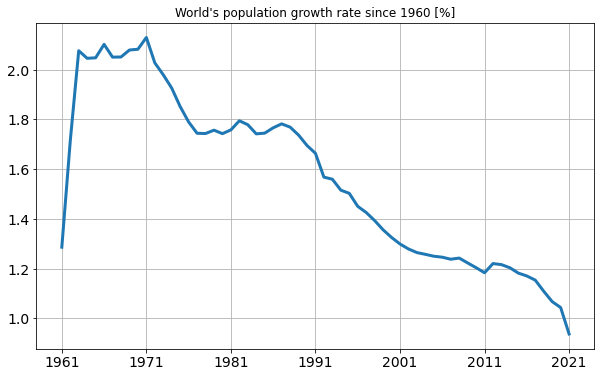

In [25]:
data4["Growth_rate_in%"][1:].plot(kind="line", fontsize=14, title = "World's population growth rate since 1960 [%]", grid=True, lw=3, figsize=(10,6))

#### 7. Is this world's population growth increasing or decreasing over the years?

In [26]:
data4[data4["Growth_rate_in%"] == data4["Growth_rate_in%"].max()]

,World_population,Growth_rate_in%
1971,3.721569e+09,2.128819


#### **The graph above of the world population growth rate clearly shows that this rate generally increased until 1971. After that year, with slight breaks in the 1980s, this rate dropped to 0.94% in 2021.**

#### 8. What world's population can be expected in 2050?

In [37]:
# Converting the year index to datetime
data6 = data4["World_population"]
data6.index = pd.to_datetime(data6.index, format='%Y')
data6 = pd.DataFrame(data6)
data6

,World_population
1960-01-01,3.003298e+09
1961-01-01,3.041923e+09
1962-01-01,3.094037e+09
1963-01-01,3.158256e+09
1964-01-01,3.222844e+09
...,...
2017-01-01,7.432378e+09
2018-01-01,7.514805e+09
2019-01-01,7.595012e+09
2020-01-01,7.674282e+09


In [59]:
# Using ARMA model to forecast population in the year 2050
y = data6["World_population"]

ARMAmodel = sm.tsa.statespace.SARIMAX(y, order=(4, 0, 3))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast("2050-01-01").conf_int(alpha = 0.05)
y_pred.tail(1)

,lower World_population,upper World_population
2050-01-01,9.164498e+09,1.006132e+10


<AxesSubplot:title={'center':"World's Population Prediction to 2050"}>

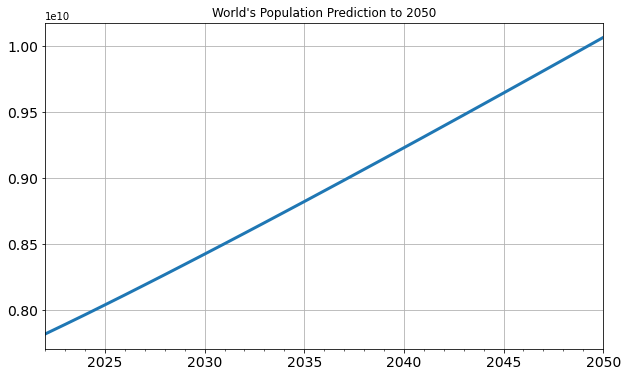

In [68]:
y_pred["upper World_population"].plot(kind="line", fontsize=14, title="World's Population Prediction to 2050", grid=True, lw=3, figsize=(10,6))

#### **From the above table, it can be seen that the world's population in the year 2050 might be from 9.16 billion people to 10 billion people based on the current treand.**

#### 9. Is it possible to assume that any country will have double its population in 2050 compared to 2020? If so, which country?


In [65]:
def predict_2050(df):
    '''This function predicts the lower and upper bound for population for each country for the year 2050 using ARMA model.
    - and return a dataframe containing countries, population in 2020, lower bound for population in 2050 and upper bound in 2050.
    - in df1 we have set each year as the index of dataframe.
    - in df2 we have set the country name as index which we will be using for creating final dataframe.
    - And used ARMA model to forcast future values.
    '''
    
    elements = []
    
    df1 = df.set_index("Country_Name").T
    df2  = df.set_index("Country_Name")
    for i in df1.columns:
        data = df1[i]
        data.index = pd.to_datetime(data.index, format='%Y')
        data = pd.DataFrame(data)
        
        y = data[i]

        ARMAmodel = sm.tsa.statespace.SARIMAX(y, order = (1, 0, 2)) 
        ARMAmodel = ARMAmodel.fit()

        y_pred = ARMAmodel.get_forecast("2050-01-01").conf_int(alpha = 0.05)
        
        elements.append([i,df2.loc[i,"2020"],y_pred.tail(1).iloc[0,0],y_pred.tail(1).iloc[0,1]])

    out_df = pd.DataFrame(elements,columns=["Country","2020","2050_lower_bound","2050_upper_bound"])
    
    return out_df
          

In [66]:
data7 = df.drop(["Country_Code","Capital","Continent","Area_(km²)"],axis=1)
prediction_2050 = predict_2050(data7)

In [67]:
#Checking for countries if population will be double or not
prediction_2050["population_double"] = None
for i in range(0,len(prediction_2050)):
    if prediction_2050["2020"][i]*2 <= prediction_2050["2050_upper_bound"][i]:
        prediction_2050["population_double"][i] = "Yes"
    else:
        prediction_2050["population_double"][i] = "No"
        
prediction_2050

,Country,2020,2050_lower_bound,2050_upper_bound,population_double
0,Afghanistan,38928341,2.734711e+07,5.220337e+07,No
1,Albania,2837849,2.215280e+06,3.344223e+06,No
2,Algeria,43851043,3.915266e+07,5.113969e+07,No
3,American Samoa,55197,4.577850e+04,6.374670e+04,No
4,Andorra,77265,6.128718e+04,9.323697e+04,No
...,...,...,...,...,...
208,Vietnam,97338583,8.219356e+07,1.144634e+08,No
209,Virgin Islands (U.S.),106290,6.729919e+04,1.380598e+05,No
210,"Yemen, Rep.",29825968,2.646716e+07,3.545842e+07,No
211,Zambia,18383956,1.632844e+07,2.260832e+07,No


In [46]:
prediction_2050["population_double"].value_counts()

No    213
Name: population_double, dtype: int64

#### **From the prediction above, it can be seen that there is not any country whose population will double in the year 2050.**

## Part 6: 
Conclusion (10 Points) – A brief, concise narrative explaining your conclusions.

#### The findings from the data analysis in this project present that the world's population is growing approximately linearly. Asia and Africa account for the largest share of the world's population. In Asia, China, India, and Indonesia have the largest population, and in Africa, Nigeria, Ethiopia, and Egypt. The greatest relative population growth rate is in Syria, Niger, and Equatorial Guinea. Of the twenty most populous countries, the Democratic Republic of the Congo, Nigeria, and Ethiopia, which are located in Africa, have the largest population growth rate. On the other hand, countries such as Germany, Russia, and Japan have negative population growth rate, so their population will decrease. This may be a problem namely in Japan. A country like Bahrain has a high population density with one of the fastest-growing populations in the world. This combination can bring potentially big problems to this country. Another insight is that the world's population growth rate has generally decreased since 1971 to the level of 0.93% in 2021. The SARIMAX model predicts a possible range of world population from 9.2 to 10 billion people in 2050. No country in the world would have double the population in 2050 compared to 2020.